<a href="https://colab.research.google.com/github/SandovalErick19/Python-for-Finance/blob/main/Obtaining_the_Efficient_Frontier_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['BTC-USD','ETH-USD']
pf_data = pd.DataFrame()
for a in assets:
  pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2020-1-1')['Adj Close']

In [4]:
pf_data.tail()

,BTC-USD,ETH-USD
Date,,
2020-12-02,19201.091797,598.352356
2020-12-03,19445.398438,616.708740
2020-12-04,18699.765625,569.354187
2020-12-05,19154.230469,596.595459
2020-12-06,19162.542969,597.454041


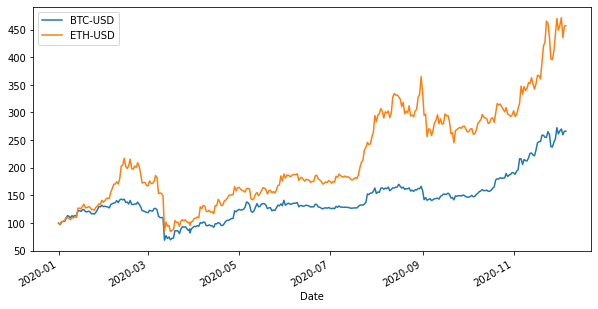

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 11

BTC-USD    0.031669
ETH-USD    0.049144
dtype: float64

In [8]:
log_returns.cov() * 11

,BTC-USD,ETH-USD
BTC-USD,0.018183,0.020824
ETH-USD,0.020824,0.031235


In [9]:
weights = np.random.random(2)
weights /= np.sum(weights)
weights

array([0.15102836, 0.84897164])

In [10]:
weights[0] + weights[1]

1.0

Expected portfolio Return:

In [11]:
np.sum(weights * log_returns.mean()) * 250

1.0569236040860674

In [13]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
  weights = np.random.random(2)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights * log_returns.mean()) * 12)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 12, weights))))

pfolio_returns, pfolio_volatilities

([0.04621721743339785,
  0.04399964589575061,
  0.03979973354219407,
  0.049649123552615256,
  0.03489759195859233,
  0.05249637152498876,
  0.04620706791815816,
  0.04814478024499141,
  0.041726429790179896,
  0.04116911762745547,
  0.0441358465344658,
  0.036182735990312166,
  0.04981178733919997,
  0.041936356779680564,
  0.0463529866250242,
  0.04442325965421479,
  0.03809255668414888,
  0.0527217836713392,
  0.04158849395929462,
  0.052451794009294644,
  0.039537351999566275,
  0.04957601678343204,
  0.038253232003447976,
  0.04969989565628172,
  0.0435218840349801,
  0.0390169975502979,
  0.04493770407569975,
  0.05270267934166055,
  0.0439930601018513,
  0.04367519516996503,
  0.049770484690963845,
  0.04518056528830141,
  0.048099250333342926,
  0.043939373828986564,
  0.035669993841822054,
  0.046609112401891806,
  0.037958430943174776,
  0.048654790804910544,
  0.04158330361154351,
  0.03668362447593014,
  0.04636813399900831,
  0.04310426284329786,
  0.051306059598050326,
  

In [14]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [15]:
portfolios.head()

,Return,Volatility
0,0.046217,0.162909
1,0.044000,0.157406
2,0.039800,0.148548
3,0.049649,0.172394
4,0.034898,0.141225


Text(0, 0.5, 'Expected Return')

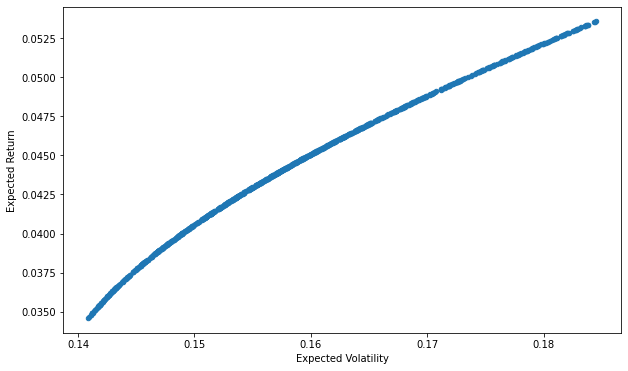

In [17]:
portfolios.plot(x='Volatility', y='Return', kind='scatter',figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')